In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      994 non-null    float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 78.3+ KB


In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.00000,1000.00000,1000.000000,1000.000000,994.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-122.15555,37.73947,37.492000,2385.033000,485.169014,1219.019000,461.481000,3.842993,209518.612000
std,0.11630,0.09757,13.184604,2057.909097,385.080909,996.689703,365.536513,1.811349,89037.843545
min,-122.34000,37.47000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,60000.000000
25%,-122.25000,37.68000,28.000000,1263.750000,261.000000,661.750000,253.000000,2.562500,148650.000000
50%,-122.18000,37.76000,39.000000,1897.500000,391.000000,966.500000,367.000000,3.514050,195350.000000
75%,-122.08000,37.81000,51.000000,2847.750000,565.750000,1447.750000,538.500000,4.899225,254200.000000
max,-121.61000,37.90000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,13.499000,500001.000000


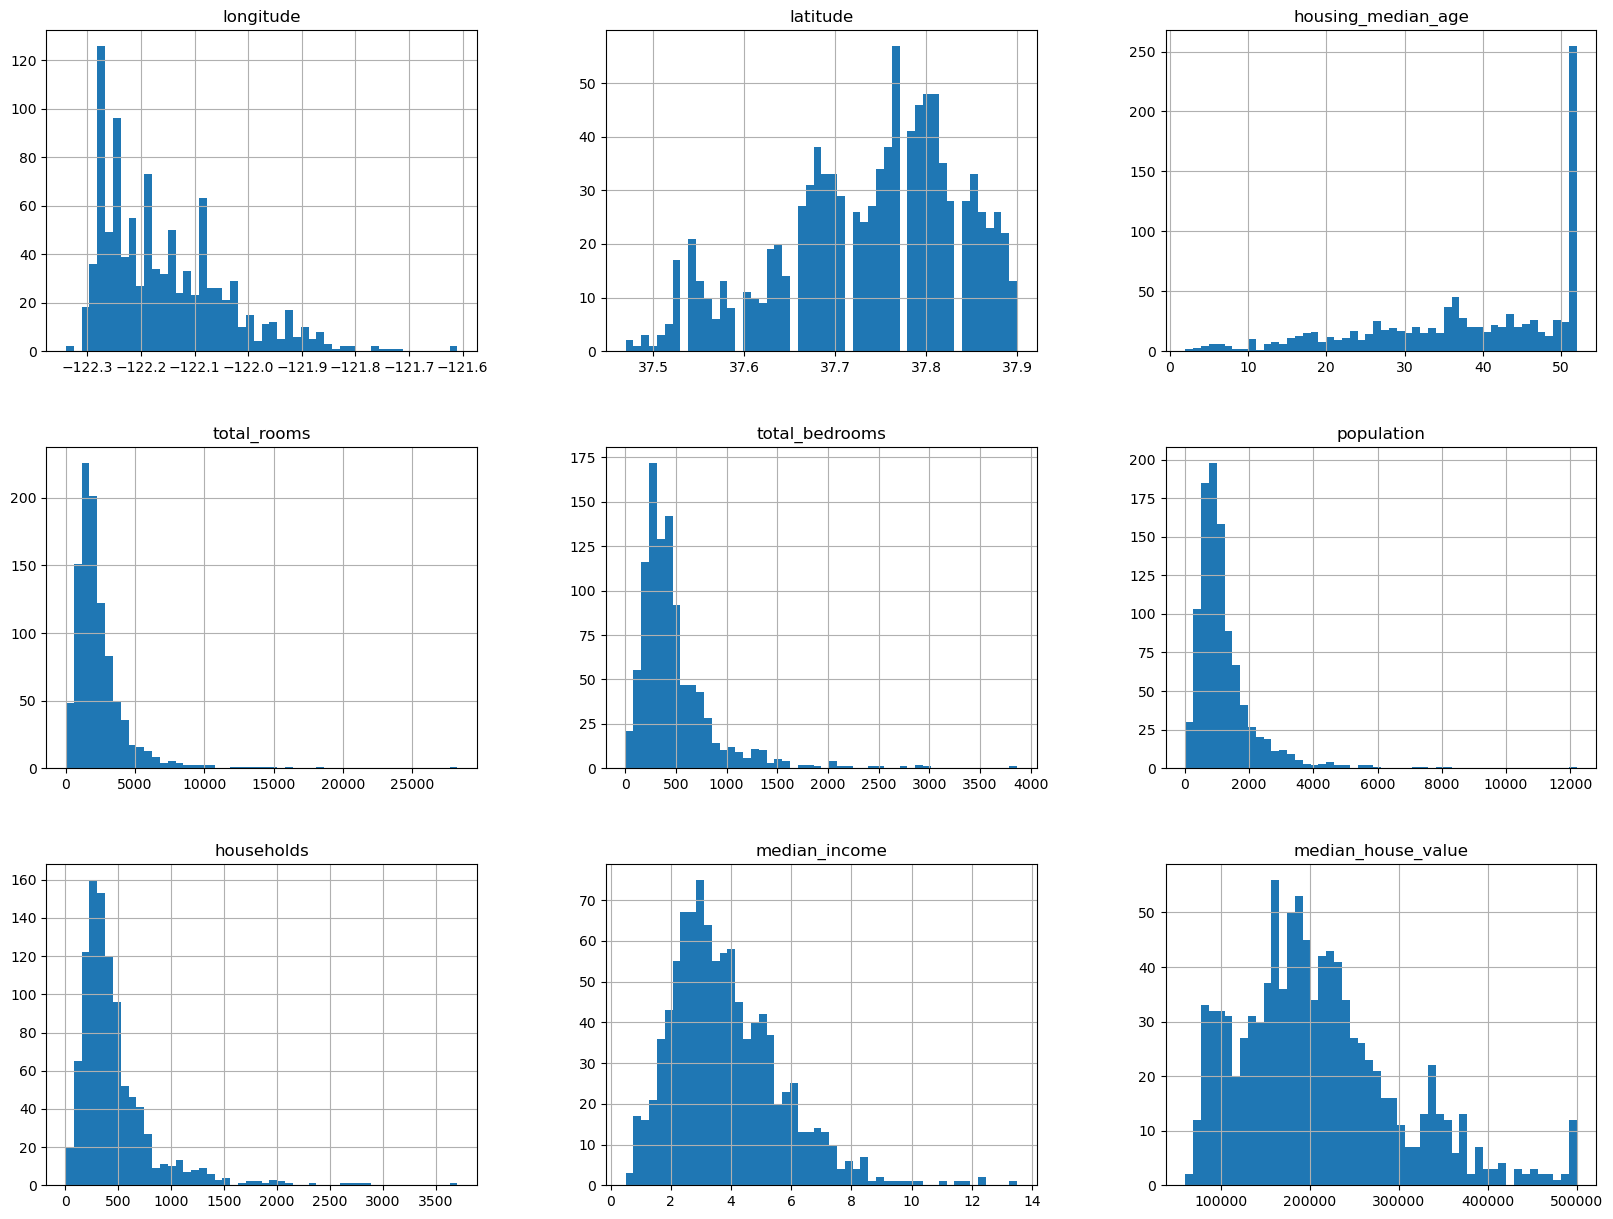

In [17]:

df.hist(bins=50,figsize=(20,15))
plt.show()

In [18]:
import numpy as np


def split_train_test(data, test_radio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_radio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]





In [19]:
X, y = split_train_test(data=df, test_radio=0.2)

print(f"Shape of the X: {X.shape}\n")
print(f"Shape of y: {y.shape}")




Shape of the X: (800, 10)

Shape of y: (200, 10)


In [20]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xFFFFFFFF < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]